In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clean.csv', index_col=0)

In [3]:
cols = ['School', 'Section', 'Degree', 'Major', 'Gender']
for col in cols:
    data[col] = data[col].astype('category')

In [4]:
data = data.drop(data.index[44]).drop(data.index[11])

In [5]:
data.describe()

,Age,Classical,Rock,Pop,R&B/Soul,Electronic,Folk,Jazz,Blues,Hiphop,Total
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,23.200000,3.850000,3.500000,5.316667,3.800000,3.833333,1.750000,2.550000,2.216667,4.250000,13.191667
std,2.748189,2.898422,3.083581,3.259883,3.266678,3.163171,2.369474,2.842922,2.662302,3.615527,13.178080
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,21.750000,1.000000,0.000000,2.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,23.000000,4.000000,3.000000,5.000000,3.500000,3.000000,1.000000,1.000000,1.000000,3.000000,9.000000
75%,25.000000,6.250000,6.000000,8.000000,6.000000,6.000000,3.000000,4.000000,4.000000,8.000000,18.000000
max,31.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,80.000000


In [6]:
data.groupby(['School', 'Section']).count()[['Age']].rename(columns={'Age': 'Count'})

Count
School Section                                                  
EPFL   College of Humanities (CDH)                           3.0
       College of Management of Technology (CDM)             1.0
       Faculté de biologie et de médecine                    NaN
       Faculté de droit, de sciences criminelles, d’ad...    NaN
       Faculté des géosciences de l’environnement            NaN
       Faculté des hautes études commerciales                NaN
       Faculté des lettres                                   NaN
       Faculté des sciences sociales et sciences polit...    NaN
       School of Architecture, Civil and Environmental...    8.0
       School of Basic Sciences (SB)                         5.0
       School of Computer and Communication Sciences (IC)    5.0
       School of Engineering (STI)                           9.0
UNIL   College of Humanities (CDH)                           NaN
       College of Management of Technology (CDM)             NaN
       Faculté de biologie et de médecine                    5.0
       Faculté de droit, de sciences criminelles, d’ad...    2.0
       Faculté des géosciences de l’environnement            3.0
       Faculté des hautes études commerciales                7.0
       Faculté des lettres                                   6.0
       Faculté des sciences sociales et sciences polit...    6.0
       School of Architecture, Civil and Environmental...    NaN
       School of Basic Sciences (SB)                         NaN
       School of Computer and Communication Sciences (IC)    NaN
       School of Engineering (STI)                           NaN

In [7]:
data.dtypes

Age              int64
Gender        category
Classical        int64
Rock             int64
Pop              int64
R&B/Soul         int64
Electronic       int64
Folk             int64
Jazz             int64
Blues            int64
Hiphop           int64
Total          float64
School        category
Section       category
Degree        category
Major         category
dtype: object

In [8]:
data.head()

,Age,Gender,Classical,Rock,Pop,R&B/Soul,Electronic,Folk,Jazz,Blues,Hiphop,Total,School,Section,Degree,Major
0,26,Female,3,3,4,9,1,1,1,1,10,28.0,UNIL,Faculté des lettres,Master,Humanités numériques
1,20,Female,8,8,8,5,6,3,3,3,5,2.0,UNIL,Faculté des sciences sociales et sciences poli...,Bachelor,Psychologie
2,29,Female,0,0,1,2,0,0,0,0,3,5.0,UNIL,"Faculté de droit, de sciences criminelles, d’a...",Master,Droit et professions judiciaires
3,25,Female,0,3,8,5,9,0,0,0,10,16.0,UNIL,Faculté des sciences sociales et sciences poli...,Bachelor,Sciences sociales
4,31,Female,9,3,4,3,3,3,7,6,4,17.0,UNIL,Faculté des lettres,Master,Lettres avec spécialisation


In [9]:
def vectors_per_school(data):
    '''Creates a dictionary with keys being each school, and the values the vector representing the musical taste'''
    vectors_dict = {}
    for school in ['EPFL', 'UNIL']:
        vectors_dict[school] = data[data['School'] == school][data.columns[2:11]].values
        
    return vectors_dict

In [10]:
def binary_vectors(data, school):
    '''Creates two list of vectors, one for the given school, one for all the other'''
    vectors = []
    vectors.append(data[data['School'] == school][data.columns[2:11]].values)
    vectors.append(data[data['School'] != school][data.columns[2:11]].values)
    
    return vectors

In [11]:
def cos_sim(vectors_1, vectors_2):
    '''Cosine similarity of 2 vectors. Values close to 1 mean similar vectors'''
    mean_1 = vectors_1.mean(axis=0)
    mean_2 = vectors_2.mean(axis=0)
    
    return mean_1.dot(mean_2) / (np.linalg.norm(mean_1) * np.linalg.norm(mean_2))

In [12]:
def abs_diff(vectors_1, vectors_2):
    '''Sum of absolute difference of 2 vectors. Values close to 0 mean similar vectors'''
    mean_1 = vectors_1.mean(axis=0)
    mean_2 = vectors_2.mean(axis=0)
    
    mean_1 /= np.sum(mean_1)
    mean_2 /= np.sum(mean_2)
    
    return np.sum(np.abs(mean_1 - mean_2))

In [13]:
vectors_per_school(data)

{'EPFL': array([[ 0,  1,  1,  2,  5,  0,  0,  0,  8],
        [ 2,  2,  3,  4,  8,  0,  0,  0,  0],
        [ 1,  1,  1,  0,  1,  0,  0,  0,  0],
        [ 2,  3,  3,  1,  1,  0,  0,  0,  3],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 7,  0,  8,  0,  8,  0,  0,  0,  8],
        [ 2,  0,  2,  1,  0,  1,  0,  1,  0],
        [ 8,  0,  0,  0,  0,  0,  3,  1,  0],
        [ 0,  5, 10,  0,  3,  0,  0,  0,  5],
        [ 2,  1,  1,  0,  0,  1,  1,  0,  2],
        [ 7,  0,  4,  4,  0,  2,  7,  7,  1],
        [ 4,  0,  0,  0,  0,  5,  1,  2,  0],
        [ 7,  7,  9,  5,  5,  7,  7,  6,  6],
        [10,  9,  9,  9,  8,  8, 10, 10,  9],
        [ 5,  5,  3,  0,  1,  0,  8,  8,  1],
        [ 6,  7,  8,  6,  3,  6,  6,  7,  3],
        [ 1,  1,  1,  1,  1,  2,  1,  1,  1],
        [ 3,  0,  2,  0,  0,  0,  2,  0,  2],
        [ 0,  0, 10, 10,  3,  0,  4,  4, 10],
        [ 1,  1,  1,  0,  1,  0,  0,  0,  1],
        [ 0,  1,  2,  0,  1,  1,  0,  0,  0],
        [ 2,  7, 10,  8,  

In [16]:
epfl_unil = binary_vectors(data, 'EPFL')
# comp_science_binary = binary_vectors(data[data['School'] != 'comp_science'], 'engineering')

In [17]:
epfl_unil

[array([[ 0,  1,  1,  2,  5,  0,  0,  0,  8],
        [ 2,  2,  3,  4,  8,  0,  0,  0,  0],
        [ 1,  1,  1,  0,  1,  0,  0,  0,  0],
        [ 2,  3,  3,  1,  1,  0,  0,  0,  3],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 7,  0,  8,  0,  8,  0,  0,  0,  8],
        [ 2,  0,  2,  1,  0,  1,  0,  1,  0],
        [ 8,  0,  0,  0,  0,  0,  3,  1,  0],
        [ 0,  5, 10,  0,  3,  0,  0,  0,  5],
        [ 2,  1,  1,  0,  0,  1,  1,  0,  2],
        [ 7,  0,  4,  4,  0,  2,  7,  7,  1],
        [ 4,  0,  0,  0,  0,  5,  1,  2,  0],
        [ 7,  7,  9,  5,  5,  7,  7,  6,  6],
        [10,  9,  9,  9,  8,  8, 10, 10,  9],
        [ 5,  5,  3,  0,  1,  0,  8,  8,  1],
        [ 6,  7,  8,  6,  3,  6,  6,  7,  3],
        [ 1,  1,  1,  1,  1,  2,  1,  1,  1],
        [ 3,  0,  2,  0,  0,  0,  2,  0,  2],
        [ 0,  0, 10, 10,  3,  0,  4,  4, 10],
        [ 1,  1,  1,  0,  1,  0,  0,  0,  1],
        [ 0,  1,  2,  0,  1,  1,  0,  0,  0],
        [ 2,  7, 10,  8,  3,  9,  

In [20]:
np.mean(epfl_unil[0], axis=0)

array([4.06451613, 3.32258065, 4.77419355, 3.19354839, 3.22580645,
       2.12903226, 3.22580645, 2.70967742, 3.4516129 ])

In [22]:
np.mean(epfl_unil[1], axis=0)

array([3.62068966, 3.68965517, 5.89655172, 4.44827586, 4.48275862,
       1.34482759, 1.82758621, 1.68965517, 5.10344828])

In [18]:
cos_sim(epfl_unil[0], epfl_unil[1])

0.9615668498661751

In [19]:
abs_diff(epfl_unil[0], epfl_unil[1])

0.2775381264369006

In [23]:
def sample_bootstrap(binary_vecs, f=abs_diff, k=100000):
    '''2-sample bootstrap technique'''
    size_1 = binary_vecs[0].shape[0]
    size_2 = binary_vecs[1].shape[0]
    size_total = size_1 + size_2
    
    stacked = np.vstack([binary_vecs[0], binary_vecs[1]])
    
    distances = []
    
    for _ in range(k):
        # randomly picking with replacement
        indices = np.random.choice(range(size_total), size=size_total)
        new = stacked[indices]
        new_1 = new[:size_1]
        new_2 = new[size_1:]
        
        distances.append(f(new_1, new_2))
        
    return distances

In [28]:
true_diff = abs_diff(epfl_unil[0], epfl_unil[1]) # true original difference

In [29]:
diffs = sample_bootstrap(epfl_unil, f=abs_diff) # list of every differences from the 2-sample bootstrap

In [30]:
five, ninety_five = np.percentile(diffs, [5, 95]) # 5 and 95 percentiles

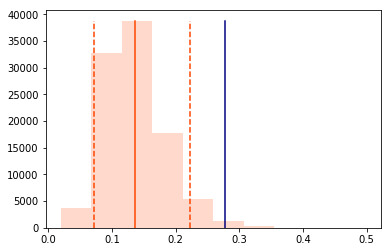

In [31]:
# hist = plt.hist(diffs, bins=np.linspace(0, 1, ), color='r', alpha=0.2)
hist = plt.hist(diffs, color='orangered', alpha=0.2)
max_hist = np.max(hist[0])
plt.plot([true_diff, true_diff], [0, max_hist], color='navy') # blue line
plt.plot([np.mean(diffs), np.mean(diffs)], [0, max_hist], color='orangered') # red line
plt.plot([five, five], [0, max_hist], color='orangered', linestyle='--') # red dashed line
plt.plot([ninety_five, ninety_five], [0, max_hist], color='orangered', linestyle='--') # red dashed line
plt.show()

If the blue line (representing the true difference) is outside of the interval of confidence of the 2-sample bootstrap, then the null hypothesis can be rejected.